### Infinite dSprites

#### Introduction
The 'InfiniteDSprites` dataset is an infinite streams of 2D sprites undergoing translation, rotation, and scaling. It is an extension of [dSprites](https://github.com/deepmind/dsprites-dataset).

#### Quick start
To start, create an instance of `InfiniteDSprites`. It is a subclass of PyTorch `IterableDataset`, so it is possible to iterate over it using a `DataLoader`.

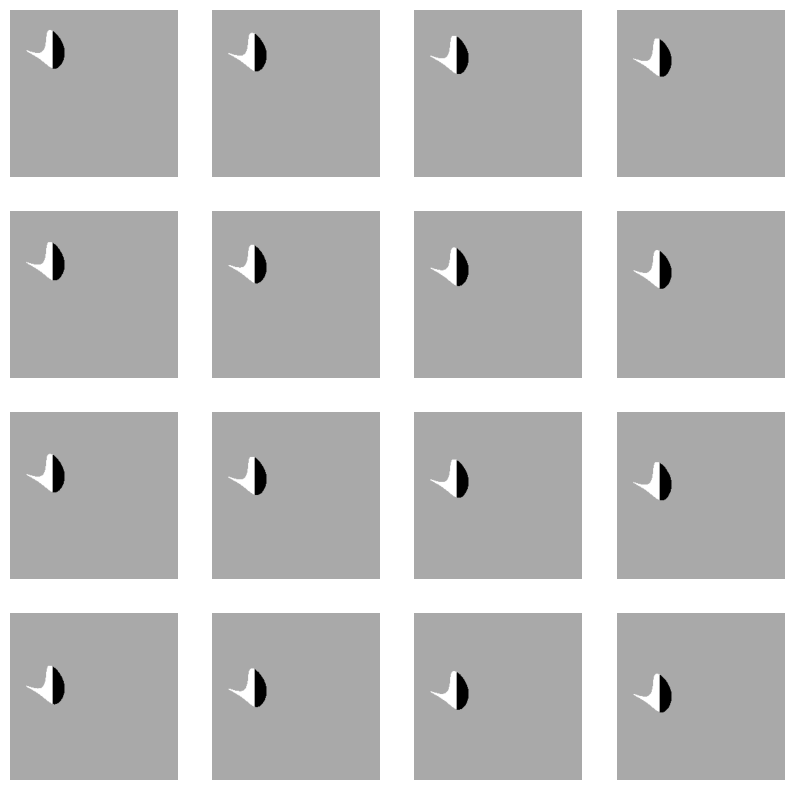

tensor([0.0000, 0.0323, 0.0645, 0.0968, 0.1290, 0.1613, 0.1935, 0.2258, 0.2581,
        0.2903, 0.3226, 0.3548, 0.3871, 0.4194, 0.4516, 0.4839],
       dtype=torch.float64)


In [26]:
from torch.utils.data import DataLoader

import idsprites as ids
from idsprites.visualization import draw_batch

dataset = ids.InfiniteDSprites()
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
img = draw_batch(batch_img, show=True)
print(factors.position_y)

#### Fine-grained control
The dataset has many dials that you can turn to adjust the distribution of the data. In particular, you can control the image size and the range of variability of the generative factors (by default, they are identical to the original dSprites):

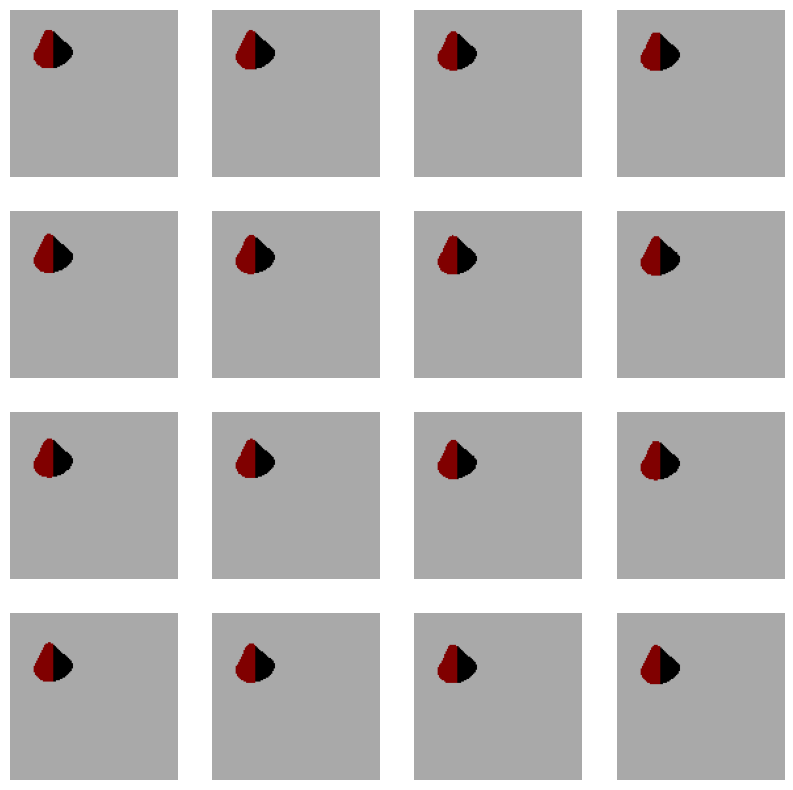

In [33]:
import numpy as np

resolution = 100
dataset = ids.InfiniteDSprites(
    img_size=128,
    color_range=["maroon", "darkgreen", "darkblue"],
    scale_range= np.linspace(0.5, 1.0, resolution),
    orientation_range= np.linspace(0, 2 * np.pi, resolution),
    position_x_range= np.linspace(0, 1, resolution),
    position_y_range= np.linspace(0, 1, resolution),
)
dataloader = DataLoader(dataset, batch_size=16)
batch_img, _ = next(iter(dataloader))
img = draw_batch(batch_img, show=True)

By default, the resulting images will be an exhaustive product of these ranges in the order of (shape, color, scale, orientation, position_x, position_y). Think about it as an odometer, with the rightmost element advancing at every iteration.


> **NOTE**: the order in the `factors` namedtuple is (color, shape, scale, orientation, position_x, position_y). This is to maintain compatibility with dSprites. In any case, it is advisable to access the specific factor factors by name.

#### Subclasses
Use the `RandomDSprites` subclass to sample random values of each factor from an appropriate range at each step:

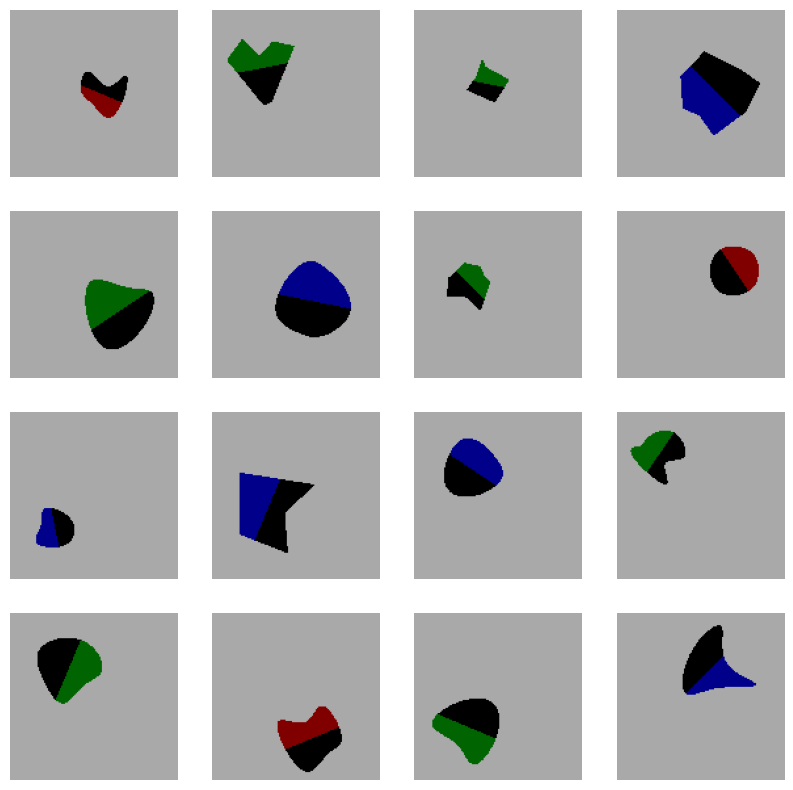

tensor([0.6129, 0.0968, 0.3871, 0.6774, 0.7742, 0.7097, 0.1613, 0.9032, 0.0323,
        0.1613, 0.1935, 0.0000, 0.1935, 0.6774, 0.1613, 0.6129],
       dtype=torch.float64)


In [32]:
dataset = ids.RandomDSprites(img_size=128, color_range=["maroon", "darkgreen", "darkblue"])
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
draw_batch(batch_img, show=True)
print(factors.position_x)